# Cat or Dog?

## Dataset

This Dataset contains about 5000 pictures of cats and dogs (4000 for training and 1000 for testing). Each categories will be in a separated folder, `cat-and-dog/training_set/` and `cat-and-dog/test_set` and then in sub folders `cats` and `dogs`.

In [1]:

!curl "https://wagon-public-datasets.s3.amazonaws.com/deep_learning_datasets/cat-and-dog.zip" --output cat-and-dog.zip

# Let's store the location of our data in 2 variables that we can re use later

train_data_dir = "cat-and-dog-small/training_set/"
test_data_dir = "cat-and-dog-small/test_set/"

!unzip cat-and-dog.zip

A saída de streaming foi truncada nas últimas 5000 linhas.
  inflating: cat-and-dog-small/training_set/dogs/dog.1223.jpg  
  inflating: cat-and-dog-small/training_set/dogs/dog.1579.jpg  
  inflating: cat-and-dog-small/training_set/dogs/dog.239.jpg  
  inflating: cat-and-dog-small/training_set/dogs/dog.1592.jpg  
  inflating: cat-and-dog-small/training_set/dogs/dog.1586.jpg  
  inflating: cat-and-dog-small/training_set/dogs/dog.588.jpg  
  inflating: cat-and-dog-small/training_set/dogs/dog.1343.jpg  
  inflating: cat-and-dog-small/training_set/dogs/dog.365.jpg  
  inflating: cat-and-dog-small/training_set/dogs/dog.403.jpg  
  inflating: cat-and-dog-small/training_set/dogs/dog.1425.jpg  
  inflating: cat-and-dog-small/training_set/dogs/dog.1431.jpg  
  inflating: cat-and-dog-small/training_set/dogs/dog.417.jpg  
  inflating: cat-and-dog-small/training_set/dogs/dog.371.jpg  
  inflating: cat-and-dog-small/training_set/dogs/dog.1357.jpg  
  inflating: cat-and-dog-small/training_set/dogs/do

In [2]:
!ls

cat-and-dog-small  cat-and-dog.zip  sample_data


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img = load_img(f"{train_data_dir}dogs/dog.15.jpg")
x = img_to_array(img)/255  # We divide the pixel value by 255 to end up between 0 and 1

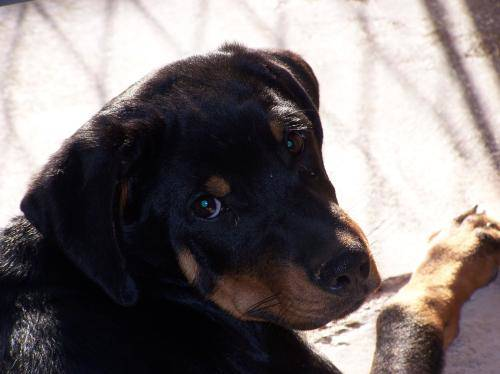

In [5]:
img

In [6]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

In [8]:
type(x)

numpy.ndarray

In [7]:
x.shape

(374, 500, 3)

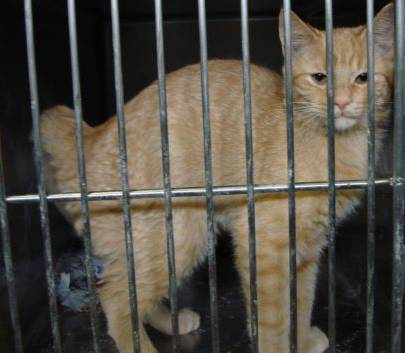

In [9]:
from tensorflow.keras.preprocessing.image import array_to_img, img_to_array, load_img

img = load_img(f"{train_data_dir}cats/cat.15.jpg")
x = img_to_array(img)/255  # We divide the pixel value by 255 to end up between 0 and 1
img

In [10]:
type(img)
type(x)

numpy.ndarray

In [11]:
x.shape

(353, 405, 3)

### First (naive) model

In [12]:
#import

from tensorflow.keras import Sequential, layers



In [14]:
#Architecture


model = Sequential()


model.add(layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu', input_shape=(150,150,3)))

model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))

model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))

model.add(layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 150, 150, 32)        │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 150, 150, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 150, 150, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 2880000)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │     184,320,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 184,422,625 (703.52 MB)

 Trainable params: 184,422,625 (703.52 MB)

 Non-trainable params: 0 (0.00 B)

Here we didn't use any pooling layers which gave us a super high amount of parameters ...

### First (good) model

This time WITH pooling layers

In [15]:
model = Sequential()

model.add(layers.Rescaling(1./255, input_shape=(150,150,3)))
model.add(layers.Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))


model.add(layers.Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(64, kernel_size=(3,3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Conv2D(128, kernel_size=(3,3), padding='same', activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dropout(0.5))

model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 150, 150, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 75, 75, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 75, 75, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 37, 37, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 37, 37, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 18, 18, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 18, 18, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 9, 9, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 10368)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         663,616 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 766,177 (2.92 MB)

 Trainable params: 766,177 (2.92 MB)

 Non-trainable params: 0 (0.00 B)

With pooling layers with drastically reduced the amount of parameters from 165,286,113 to 504,033

In [16]:
#import

from tensorflow.keras.optimizers import Adam

In [18]:
#compile
adam  = Adam(learning_rate=0.001)

model.compile(optimizer=adam, loss='binary_crossentropy', metrics=['accuracy'])



Here, we'll create a `Tensorflow Datasets` object.
This will allow us to:


*   Grab images from our directory batch by batch, we won't load the FULL data at the same time
*   Reshape all the images to our desired input shape, 150x150 in this recap



We have to specify different things:


*   Where the data is located (that's why we saved the folder name in a variable)
*   The target size to resize our images so they fit our model
*   The Batch size
*   The "label mode", here we say binary, and the classes will be infered based on the folders name. It will chose cat = 0 and dog = 1
*   Here the labels are inferred based on the folder structure








In [19]:
#import image_dataset_from_directory
from tensorflow.keras.utils import image_dataset_from_directory




In [20]:
batch_size = 64

In [21]:
#Define train_ds and val_ds


train_ds = image_dataset_from_directory(
    train_data_dir,
    labels='inferred',
    label_mode='binary',
    seed=123,
    image_size=(150,150),
    batch_size= batch_size
)



# We define a second one for the test data

val_ds = image_dataset_from_directory(
    test_data_dir,
    labels='inferred',
    label_mode='binary',
    seed=123,
    image_size=(150,150),
    batch_size= batch_size
)


Found 4004 files belonging to 2 classes.
Found 1012 files belonging to 2 classes.


In [22]:
class_names = train_ds.class_names
print(class_names)

['cats', 'dogs']


Here we'll create our callbacks. Those functions will be called at the end of every single epoch.
We'll use:


*   `ModelCheckpoint` to save the best version of our model after every epoch
*   `ReduceLROnPlateau` to reduce the `learning_rate` if the model doesn't get better after a few epochs
*   `EarlyStopping` to stop the training after a certain time if it's not improving



In [24]:
#import callbacks
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint


In [25]:
MODEL = 'model_1'


modelCheckpoint = ModelCheckpoint("{}.keras".format(MODEL), monitor='val_loss', save_best_only=True)

LReducer = ReduceLROnPlateau(monitor='val_loss', patience=3, factor=0.1, min_lr= 0, verbose=1)

EarlyStopper =  EarlyStopping(monitor='val_loss', patience=10, restore_best_weights =True, verbose=1)


In [26]:
%%time

#fit

history = model.fit(
    train_ds,
    epochs=30,
    validation_data=val_ds,
    callbacks=[EarlyStopper,LReducer, modelCheckpoint],
    verbose=1
)

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 199ms/step - accuracy: 0.5106 - loss: 0.6987 - val_accuracy: 0.5919 - val_loss: 0.6827 - learning_rate: 0.0010
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 75ms/step - accuracy: 0.5690 - loss: 0.6817 - val_accuracy: 0.6374 - val_loss: 0.6660 - learning_rate: 0.0010
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - accuracy: 0.6261 - loss: 0.6510 - val_accuracy: 0.6749 - val_loss: 0.6201 - learning_rate: 0.0010
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 5s 82ms/step - accuracy: 0.6791 - loss: 0.6127 - val_accuracy: 0.6858 - val_loss: 0.6043 - learning_rate: 0.0010
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 101ms/step - accuracy: 0.6871 - loss: 0.5888 - val_accuracy: 0.6601 - val_loss: 0.6243 - learning_rate: 0.0010
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 9s 86ms/step - accuracy: 0.6967 - loss: 0.5804 - val_accuracy: 0.7530 - val_loss: 0.5369 - learning_rate: 0.0010
Epoch 7/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 6s 88ms/step - accuracy: 0.7476 - loss: 0.5285 - val

- Plotting functions

In [27]:
def plot_history(history):
    fig, ax = plt.subplots(1, 2, figsize=(15,5))
    ax[0].set_title('loss')
    ax[0].plot(history.epoch, history.history["loss"], label="Train loss")
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss")
    ax[1].set_title('accuracy')
    ax[1].plot(history.epoch, history.history["accuracy"], label="Train acc")
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation acc")
    ax[0].legend()
    ax[1].legend()

In [28]:
def plot_compare_history(history, name_history, history_1, name_history_1):

    fig, ax = plt.subplots(1, 2, figsize=(15,5))

    ax[0].set_title('loss')

    ax[0].plot(history.epoch, history.history["loss"], label="Train loss " + name_history)
    ax[0].plot(history.epoch, history.history["val_loss"], label="Validation loss " + name_history)

    ax[0].plot(history_1.epoch, history_1.history["loss"], label="Train loss " + name_history_1)
    ax[0].plot(history_1.epoch, history_1.history["val_loss"], label="Validation loss " + name_history_1)

    ax[1].set_title('Accuracy')

    ax[1].plot(history.epoch, history.history["accuracy"], label="Train Accuracy " + name_history)
    ax[1].plot(history.epoch, history.history["val_accuracy"], label="Validation Accuracy " + name_history)

    ax[1].plot(history_1.epoch, history_1.history["accuracy"], label="Train Accuracy " + name_history_1)
    ax[1].plot(history_1.epoch, history_1.history["val_accuracy"], label="Validation Accuracy " + name_history_1)

    ax[0].legend()
    ax[1].legend()

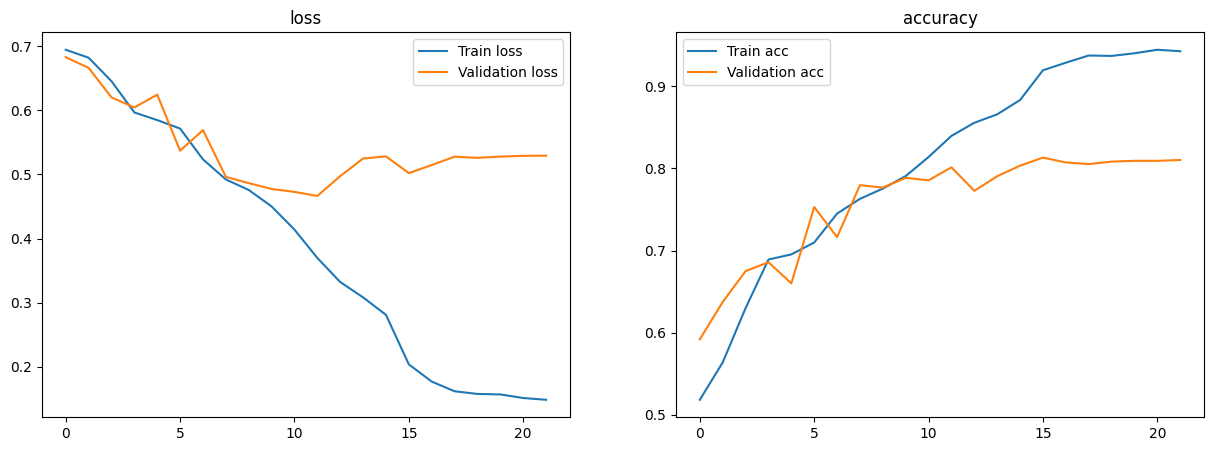

In [29]:
plot_history(history)


## Transfer Learning

![Texte alternatif…](https://cdn-images-1.medium.com/max/1600/1*9GTEzcO8KxxrfutmtsPs3Q.png)

![Texte alternatif…](https://www.researchgate.net/profile/Francesco-Orabona/publication/221363182/figure/fig1/AS:276504308142080@1442935172550/Three-ways-in-which-transfer-might-improve-learning-19.png)

### Third model with Transfer Learning

In [42]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input



vgg_model = VGG16(weights='imagenet', include_top= False, input_shape=(150,150,3))

vgg_model.trainable=False

model_3 = Sequential()

model_3.add(layers.Lambda(preprocess_input, input_shape=(150,150,3)))


model_3.add(vgg_model)

model_3.add(layers.Flatten())

model_3.add(layers.Dense(64, activation='relu'))

model_3.add(layers.Dropout(0.5))

model_3.add(layers.Dense(1, activation='sigmoid'))








/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/lambda_layer.py:65: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [43]:
model_3.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ (None, 150, 150, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │         524,352 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15,239,105 (58.13 MB)

 Trainable params: 524,417 (2.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [46]:
adam = Adam(learning_rate = 0.001)
model_3.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [49]:
MODEL = "model_3"

modelCheckpoint = ModelCheckpoint("{}.keras".format(MODEL), monitor="val_loss", verbose=0, save_best_only=True)

LRreducer = ReduceLROnPlateau(monitor="val_loss", factor = 0.1, patience=3, verbose=1, min_lr=0)

EarlyStopper = EarlyStopping(monitor='val_loss', patience=10, verbose=0, restore_best_weights=True)


In [50]:
%%time
history_3 = model_3.fit(
        train_ds,
        epochs=30,
        validation_data=val_ds,
        callbacks = [modelCheckpoint, LRreducer, EarlyStopper])

Epoch 1/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 50s 561ms/step - accuracy: 0.8354 - loss: 4.0767 - val_accuracy: 0.9654 - val_loss: 0.1518 - learning_rate: 0.0010
Epoch 2/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 171ms/step - accuracy: 0.9610 - loss: 0.1203 - val_accuracy: 0.9723 - val_loss: 0.1322 - learning_rate: 0.0010
Epoch 3/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 170ms/step - accuracy: 0.9683 - loss: 0.1058 - val_accuracy: 0.9743 - val_loss: 0.1092 - learning_rate: 0.0010
Epoch 4/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 165ms/step - accuracy: 0.9777 - loss: 0.0612 - val_accuracy: 0.9733 - val_loss: 0.1278 - learning_rate: 0.0010
Epoch 5/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 20s 156ms/step - accuracy: 0.9778 - loss: 0.0756 - val_accuracy: 0.9704 - val_loss: 0.1216 - learning_rate: 0.0010
Epoch 6/30
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.9817 - loss: 0.0363
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
63/63 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - accuracy: 0.9818 - loss: 0.0

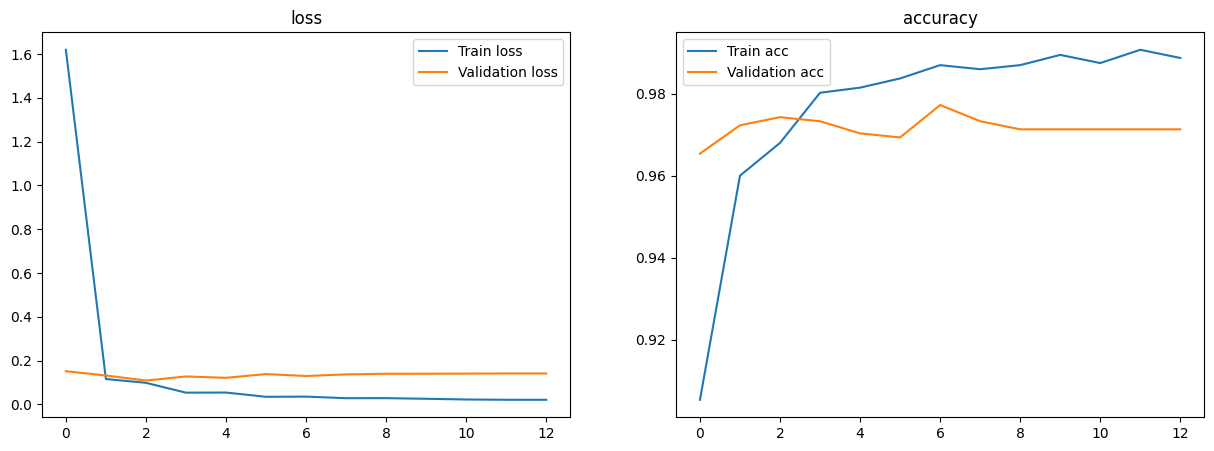

In [51]:
plot_history(history_3)

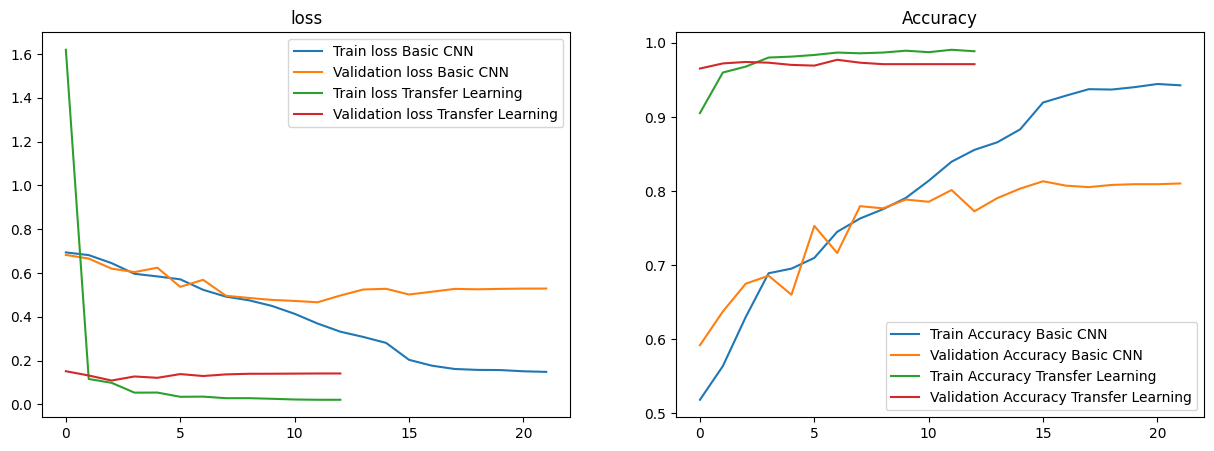

In [52]:
plot_compare_history(history, "Basic CNN", history_3, "Transfer Learning")

# Use Model

In [53]:
from PIL import Image
import requests
from io import BytesIO

def getImage(url):

  # Grabs an image based on its URL, and resize it

  response = requests.get(url)
  img = Image.open(BytesIO(response.content))
  plt.imshow(img)
  img = img.resize((150, 150))
  return img

def predictImage(url, model):

  # Takes an imafe and a model

  img = getImage(url)
  img = img_to_array(img)
  img = img.reshape((-1, 150, 150, 3))
  res = model.predict(img)[0][0]
  if(res < 0.5):
    animal = "cat"
    prob = 1-res
  if(res >= 0.5):
    animal = "dog"
    prob = res

  print("Animal : ", animal)
  print("probability = ",prob)

In [54]:
cat = "https://www.wikichat.fr/wp-content/uploads/sites/2/comment-soigner-une-plaie-dun-chat.jpg"
cat2 = "http://create.votreveterinaire.com/adm/webmaster/_empty/upload/chat_surpris.jpg"


dog = "https://images.sudouest.fr/2018/04/14/5ace461a66a4bd2b1780a0dd/widescreen/1000x500/on-ignore-si-le-chihuahua-a-deserte-ou-non-les-locaux-de-la-clinique.jpg?v1"
dog2 = "https://ds1.static.rtbf.be/article/image/370x208/7/8/f/a20f02dfccd07952da54a7f9a82b3e89-1524657315.jpg"

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Animal :  cat
probability =  0.9999999999752942


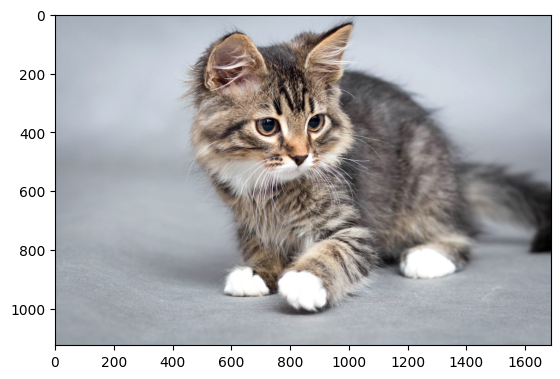

In [55]:
predictImage(cat, model_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Animal :  cat
probability =  0.9999999999999989


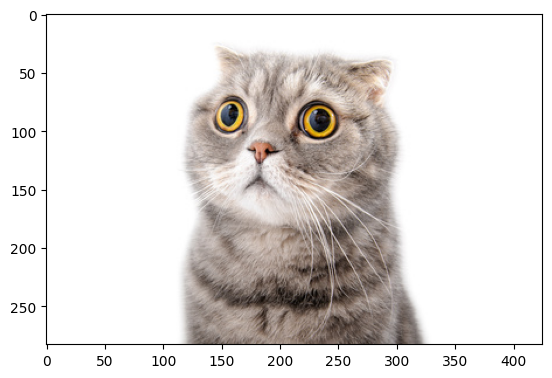

In [56]:
predictImage(cat2, model_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Animal :  dog
probability =  0.94796056


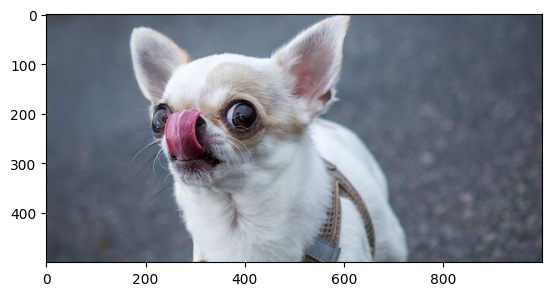

In [57]:
predictImage(dog, model_3)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Animal :  dog
probability =  1.0


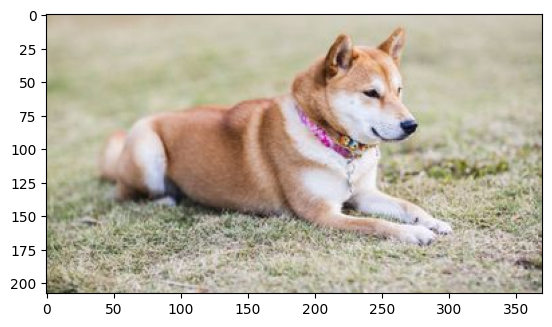

In [58]:
predictImage(dog2, model_3)